In [1]:
# Global imports
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import mpld3
import numpy as np
import pescador

seaborn.set()
np.set_printoptions(precision=4, suppress=True)
mpld3.enable_notebook()

import optimus
import datatools
import models as M

pltargs = dict(interpolation='nearest', aspect='equal', 
               cmap=plt.cm.gray_r, origin='lower')

/usr/local/lib/python2.7/dist-packages/nose/util.py:14: DeprecationWarning: The compiler package is deprecated and removed in Python 3.x.
  from compiler.consts import CO_GENERATOR
Using gpu device 0: GeForce GTX 660 Ti


/usr/local/lib/python2.7/dist-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/usr/local/lib/python2.7/dist-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


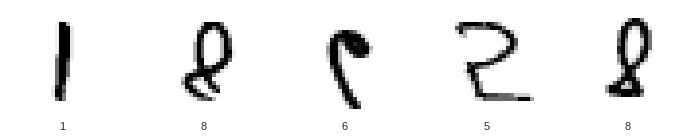

In [2]:
# let's load the data and take a look at some digits.
train, valid, test = datatools.load_mnist_npz("/home/ejhumphrey/Desktop/mnist.npz")
num_imgs = 5
fig = plt.figure(figsize=(num_imgs*2, 2))
for n, idx in enumerate(np.random.permutation(len(train[1]))[:num_imgs]):
    ax = fig.add_subplot(101 + 10*num_imgs + n)
    ax.imshow(train[0][idx, 0], **pltargs)
    ax.set_xlabel("{0}".format(train[1][idx]))
    ax.set_xticks([])    
    ax.set_yticks([]);
plt.tight_layout()

In [4]:
streams = [datatools.shuffle_stream(train[0][train[1] == cidx], cidx) 
           for cidx in range(10)]

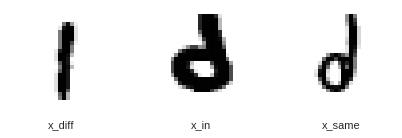

In [5]:
cstream = datatools.comparative_stream(streams)
xs = next(cstream)

num_imgs = 3
fig = plt.figure(figsize=(num_imgs*2, 2))
for n, (name, x) in enumerate(xs.items()):
    ax = fig.add_subplot(101 + 10*num_imgs + n)
    ax.imshow(x.squeeze(), **pltargs)
    ax.set_xlabel("{0}".format(name))
    ax.set_xticks([])    
    ax.set_yticks([]);
plt.tight_layout()

In [8]:
batch = pescador.buffer_batch(cstream, 100)

In [22]:
trainer, predictor = M.cmargin()

In [23]:
driver = optimus.Driver(graph=trainer, name='test')
res = driver.fit(
    source=batch, 
    hyperparams=dict(learning_rate=0.02, margin_sim=0.125, margin_diff=1.25), 
    max_iter=2500, print_freq=100)

[2016-03-04 13:57:15.499905] 0 / 2500: 3.53061795235
[2016-03-04 13:57:18.700673] 100 / 2500: 0.477933466434
[2016-03-04 13:57:21.883804] 200 / 2500: 0.346781730652
[2016-03-04 13:57:25.071437] 300 / 2500: 0.308058798313
[2016-03-04 13:57:28.256451] 400 / 2500: 0.252880573273
[2016-03-04 13:57:31.442001] 500 / 2500: 0.235836818814
[2016-03-04 13:57:34.625986] 600 / 2500: 0.19335386157
[2016-03-04 13:57:37.809591] 700 / 2500: 0.276964247227
[2016-03-04 13:57:41.001647] 800 / 2500: 0.205214634538
[2016-03-04 13:57:44.182082] 900 / 2500: 0.207141458988
[2016-03-04 13:57:47.356501] 1000 / 2500: 0.234348326921
[2016-03-04 13:57:50.537991] 1100 / 2500: 0.228171274066
[2016-03-04 13:57:53.731829] 1200 / 2500: 0.218808308244
[2016-03-04 13:57:56.908844] 1300 / 2500: 0.190020218492
[2016-03-04 13:58:00.079087] 1400 / 2500: 0.238335102797
[2016-03-04 13:58:03.260103] 1500 / 2500: 0.171605139971
[2016-03-04 13:58:06.468751] 1600 / 2500: 0.221300393343
[2016-03-04 13:58:09.671650] 1700 / 2500: 0.2

In [24]:
idx = np.random.permutation(len(valid[0]))[:500]
x_in = valid[0][idx]
y_true = valid[1][idx]
predictor.param_values = trainer.param_values
z_out = predictor(x_in=x_in)['embedding']

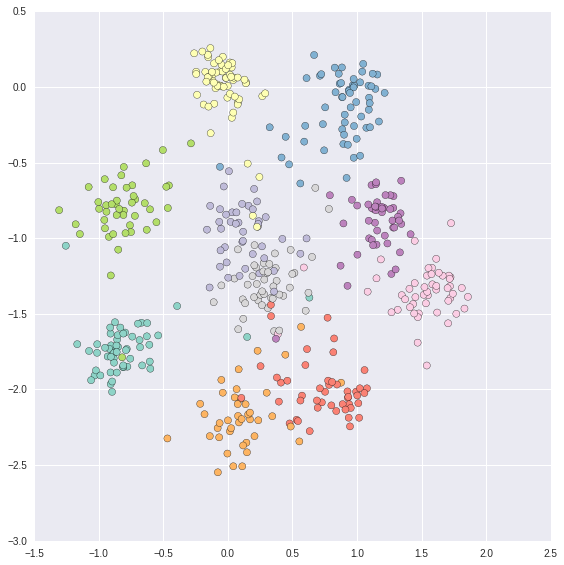

In [32]:
palette = seaborn.color_palette("Set3", 10)

fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
colors = np.array([palette[y] for y in y_true])
axhand = ax.scatter(z_out.T[0], z_out.T[1], s=50, c=colors)

tooltip = mpld3.plugins.PointLabelTooltip(axhand, y_true.tolist())
mpld3.plugins.connect(fig, tooltip)
plt.tight_layout()